In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

In [2]:
path1 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\1M NobelCitingpapers.zip'
path2 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path3 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'

In [3]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

In [4]:
f1['Field'] = f1['Nobel'].map(f2.set_index('paperid')['Field'])
f11 = f1[f1['Field'] == 'Physics']
f12 = f1[f1['Field'] == 'Chemistry']
f13 = f1[f1['Field'] == 'Medicine']

# a

In [5]:
x_pos = [1,2,]
colors = ["#1F618D","#AF601A"]
labels = ['Physics','Chemistry','Medicine']
d1 = f11.loc[f11['type'] == 'DC'  ,  'AUnum']
d2 = f12.loc[f12['type'] == 'DC'  ,  'AUnum']
d3 = f13.loc[f13['type'] == 'DC'  ,  'AUnum']
d5 = f11.loc[f11['type'] == 'CC'  ,  'AUnum']
d6 = f12.loc[f12['type'] == 'CC'  ,  'AUnum']
d7 = f13.loc[f13['type'] == 'CC'  ,  'AUnum']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]

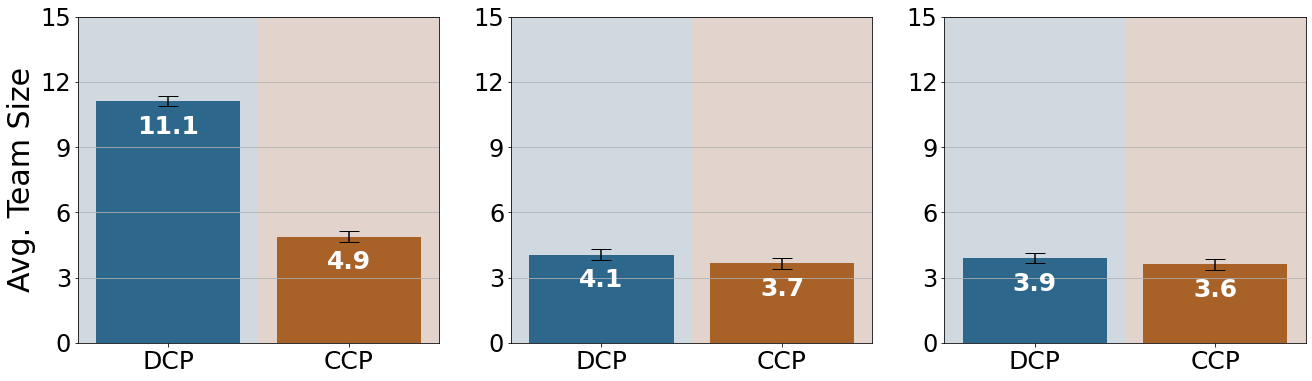

In [9]:
plt.subplots(1,3,figsize=(22,6))
for _ in range(3):
    ax = plt.subplot(1,3,_ + 1)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, yerr=[std[0],std[3]],align='center', color= colors,alpha=0.9,capsize=10)
    ax.yaxis.grid(True)
    plt.ylim((0,15))
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-1.5 , str(np.round(dd[i] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks([0,3,6,9,12,15],size = 24)
    if _ == 0:
        plt.ylabel(r'Avg. Team Size',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
#     plt.title(labels[_],size = 35)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

In [10]:
print(scipy.stats.mannwhitneyu(d1 , d5, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d2.dropna() , d6.dropna(), alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d3.dropna() , d7.dropna(), alternative='two-sided'))

MannwhitneyuResult(statistic=4836724930.0, pvalue=3.763367723962084e-123)
MannwhitneyuResult(statistic=11987434624.0, pvalue=0.0)
MannwhitneyuResult(statistic=15320375129.0, pvalue=1.2952567006128897e-276)
